In [4]:
!gdown 1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR

Downloading...
From: https://drive.google.com/uc?id=1bwRmKkPwmLKiqOgQ_LnKH0Vsc3mJKmVR
To: /content/cars24-car-price-cleaned.csv
100% 1.69M/1.69M [00:00<00:00, 197MB/s]


In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/cars24-car-price-cleaned.csv')

In [7]:
df.head()   

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0


# Objective: To build a Linear Regression model to predict the price of used cars based on various features

### To predict the price of preowned cars

## Steps to follow

1. Preprocessing of the data (Encoding, Missing value treatment, Feature engineering, Outlier detection, duplicates, column treatment, Scaling)
2. Train

## 1. Preprocessing

### 1.1 Encoding of Categorical data

In [8]:
df.shape

(19820, 18)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

In [10]:
df.select_dtypes(include= "object").columns

Index(['make', 'model'], dtype='object')

### 1. OHE -- One hot Encoding
### 2. Label Encoding -- Ordinal Data
### 3. Target Encoding

In [11]:
df.shape

(19820, 18)

In [12]:
df['model'].nunique(), df['make'].nunique()

(3233, 41)

## The curse of dimensionality

In [13]:
df.groupby('make')['selling_price'].mean()

,selling_price
make,
AMBASSADOR,1.452500
AUDI,17.177585
BENTLEY,20.902500
BMW,17.349017
CHEVROLET,2.723621
DAEWOO,0.780000
DATSUN,3.205176
DC,11.925000
FERRARI,20.902500


In [14]:
df["make"] = df.groupby('make')['selling_price'].transform("mean")
df["model"] = df.groupby('model')['selling_price'].transform("mean")

In [15]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,4.684721,1.180000,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,5.458819,4.818750,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,5.458819,3.394000,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,4.684721,2.242676,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,5.858258,6.777576,0,0,1,0,0,0,1,1,0


## MinMax Scaler (Normalization)

### [0-1]

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.194048,0.041550,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.232517,0.218382,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.232517,0.149143,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.194048,0.093193,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.252367,0.313574,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.300934,0.862069,0.018258,0.168879,0.202014,0.099919,0.137931,0.484670,0.328028,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19816,0.434413,0.931034,0.004711,0.116379,0.203347,0.138647,0.068966,0.194048,0.330632,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
19817,0.191724,0.793103,0.017606,0.147759,0.221860,0.158647,0.206897,0.318156,0.200656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
19818,0.580027,0.827586,1.000000,0.103448,0.322719,0.217391,0.172414,0.324782,0.377671,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


## 2. Training of the ML model

### 2.1 Spliting the data into Training and Testing

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(columns=["selling_price"]) # Independent variables
y = df["selling_price"] # dependent variables

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

- 70% of the data is for Training
- 30% of the data is for Testing

In [20]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13874, 17), (13874,), (5946, 17), (5946,))

In [21]:
import seaborn as sns

<Axes: xlabel='selling_price', ylabel='age'>

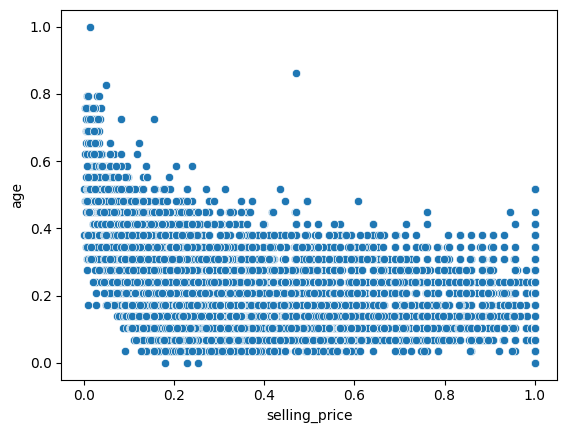

In [22]:
sns.scatterplot(x= df['selling_price'], y=df['age'])

## 2.2 Univariate Model

In [23]:
X1=X[['model']]
X1_train = X_train[['model']]
X1_test = X_test[['model']]

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
X1_train.shape, y_train.shape

((13874, 1), (13874,))

In [27]:
model.fit(X1_train, y_train)

LinearRegression()

In [29]:
model.coef_, model.intercept_                

(array([0.9967642]), np.float64(0.0015237505846132926))

In [30]:
y_hat = model.predict(X1)

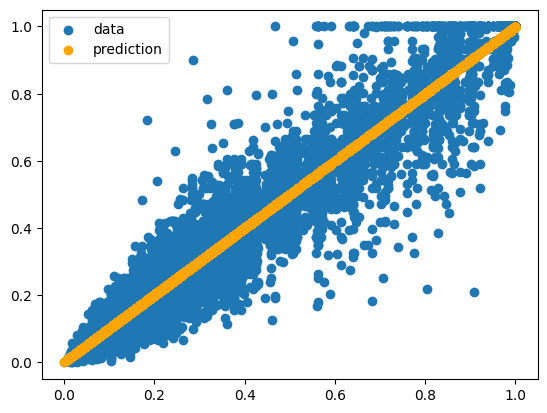

In [31]:
fig = plt.figure()
plt.scatter(X1,y,label='data')
plt.scatter(X1,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

## 2.3 Multivariate

In [32]:
X.shape, y.shape

((19820, 17), (19820,))

In [33]:
X_train.shape, y_train.shape

((13874, 17), (13874,))

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
model.coef_

array([ 0.12588418, -0.25016952, -0.228541  ,  0.07508445,  0.04530473,
       -0.12588418,  0.06460638,  0.86034164, -0.00702006, -0.00703094,
        0.00672347,  0.1292155 ,  0.01603964, -0.00661902, -0.00390528,
       -0.01629955, -0.02359347])

In [36]:
model.intercept_

np.float64(-0.011456351039687673)

In [38]:
y_hat = model.predict(X_test)

In [ ]:
y_test[:3] #Actual values from test set

,selling_price
14690,0.050965
134,0.186871
4982,0.223274


In [40]:
y_hat[:3] # Predicted values from test set

array([0.04053163, 0.21792342, 0.27513474])

# Evaluation Metrics

In [ ]:
model.score(X_test, y_test) # R2 score

0.9458843076992296

In [42]:
model.score(X_train, y_train)

0.9457591024750988